In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools
from IPython.display import Image, clear_output

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import tensorflow as tf
import pandas as pd
from data_info import *
from preprocessing_helpers import *
from datetime import datetime
%matplotlib inline
pd.set_option("display.precision", 2)
tf.random.set_seed(42)

In [2]:
new_iq_norm = [
                'precipitation_amt_mm',
                'reanalysis_air_temp_k',
                'reanalysis_avg_temp_k',
                'reanalysis_dew_point_temp_k',
                'reanalysis_max_air_temp_k',
                'reanalysis_min_air_temp_k',
                'reanalysis_precip_amt_kg_per_m2',
                'reanalysis_sat_precip_amt_mm',
                'reanalysis_specific_humidity_g_per_kg',
                'reanalysis_tdtr_k',
                'station_avg_temp_c',
                'station_diur_temp_rng_c',
                'station_max_temp_c',
                'station_min_temp_c',
]
new_iq_scale = [
                 'weekofyear',
]

extra_iq_cols = [
]
new_sj_norm = [
                'reanalysis_air_temp_k',
                'reanalysis_avg_temp_k',
                'reanalysis_dew_point_temp_k',
                'reanalysis_max_air_temp_k',
                'reanalysis_min_air_temp_k',
                'reanalysis_precip_amt_kg_per_m2',
                'reanalysis_relative_humidity_percent',
                'reanalysis_sat_precip_amt_mm',
                'reanalysis_specific_humidity_g_per_kg',
                'station_avg_temp_c',
                'station_diur_temp_rng_c',
                'station_max_temp_c',
                'station_min_temp_c',
]
new_sj_scale = [
                 'weekofyear',
]

extra_sj_cols = [
]
new_iq_cols = [LABEL_COLUMN] + CATEGORICAL_COLUMNS + new_iq_norm + new_iq_scale + extra_iq_cols + [DATETIME_COLUMN]
new_iq_cols_no_label = CATEGORICAL_COLUMNS + new_iq_norm + new_iq_scale + extra_iq_cols + [DATETIME_COLUMN]
new_sj_cols = [LABEL_COLUMN] + CATEGORICAL_COLUMNS + new_sj_norm + new_sj_scale + extra_sj_cols + [DATETIME_COLUMN]
new_sj_cols_no_label = CATEGORICAL_COLUMNS + new_sj_norm + new_sj_scale + extra_sj_cols + [DATETIME_COLUMN]


sj_col_size = {
    'precipitation_amt_mm': 40,
    'reanalysis_air_temp_k': 16,
    'reanalysis_avg_temp_k': 15,
    'reanalysis_dew_point_temp_k': 39,
    'reanalysis_max_air_temp_k': 12,
    'reanalysis_min_air_temp_k': 21,
    'reanalysis_precip_amt_kg_per_m2': 30,
    'reanalysis_relative_humidity_percent': 34,
    'reanalysis_sat_precip_amt_mm': 40,
    'reanalysis_specific_humidity_g_per_kg': 14,
    'reanalysis_tdtr_k': 21,
    'station_avg_temp_c': 41,
    'station_diur_temp_rng_c': 40,
    'station_max_temp_c': 37,
    'station_min_temp_c': 26,
    'station_precip_mm': 32,
    'weekofyear': 3
}
iq_col_size = {
    'precipitation_amt_mm': 33,
    'reanalysis_air_temp_k': 10,
    'reanalysis_avg_temp_k': 4,
    'reanalysis_dew_point_temp_k': 6,
    'reanalysis_max_air_temp_k': 41,
    'reanalysis_min_air_temp_k': 40,
    'reanalysis_precip_amt_kg_per_m2': 3,
    'reanalysis_relative_humidity_percent': 7,
    'reanalysis_sat_precip_amt_mm': 33,
    'reanalysis_specific_humidity_g_per_kg': 26,
    'reanalysis_tdtr_k': 34,
    'station_avg_temp_c': 40,
    'station_diur_temp_rng_c': 26,
    'station_max_temp_c': 39,
    'station_min_temp_c': 25,
    'station_precip_mm':10,
    'weekofyear': 3
}

In [3]:
sj_datasets, sj_norm_scale, sj_columns = generate_lstm_data(
    train_file, 
    single_step=True, 
    history_size=52, 
    cols=new_sj_cols, 
    norm_cols=new_sj_norm, 
    scale_cols=new_sj_scale,
    extra_columns=extra_sj_cols,
    prepend_with_file=train_file,
    train_frac=1.0,
    group_by_column=True
)
sj_train_x, sj_train_y = sj_datasets[0]
sj_train_x = np.array(sj_train_x)
sj_train_y = np.array(sj_train_y)
iq_datasets, iq_norm_scale, iq_columns = generate_lstm_data(
    train_file, 
    single_step=True, 
    history_size=52, 
    cols=new_iq_cols, 
    norm_cols=new_iq_norm, 
    scale_cols=new_iq_scale,
    extra_columns=extra_iq_cols,
    prepend_with_file=train_file,
    train_frac=1.0,
    group_by_column=True
)
iq_train_x, iq_train_y = iq_datasets[1]
iq_train_x = np.array(iq_train_x)
iq_train_y = np.array(iq_train_y)
sj_columns

['reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'weekofyear']

In [4]:
sj_train_x[53][0]

array([-1.28415113, -0.77349674, -0.31767771, -0.1531716 ,  0.27180253,
        0.36091001,  0.02275855,  0.33006511,  0.31978348,  0.78017211,
        0.26723291,  0.3906125 ,  0.30378983,  0.54712179,  0.96981111,
        0.62366283,  0.92297256,  0.75161203,  1.08062425,  1.19600701,
        0.54255217,  0.9983712 ,  1.27711767,  0.54255217,  0.01361932,
       -0.22057341,  0.43859345,  0.63508686,  0.9366814 ,  0.26609051,
       -0.75179107, -0.50845911, -0.78035116, -0.70495252, -0.91172757,
       -1.69427401, -1.20304048, -1.4041035 , -1.03510715, -0.90715795,
       -1.15048991, -1.83478965, -1.41095793, -1.3378441 , -1.12078742,
       -1.39724908, -1.41666994, -1.36640419, -1.6908468 , -1.44408763,
       -1.51491665, -0.88316748])

In [5]:
sj_train_x[53][0][-5:]

array([-1.36640419, -1.6908468 , -1.44408763, -1.51491665, -0.88316748])

In [6]:
sj_train_y[53]

16.0

In [7]:
trimed_sj_x = []
trimed_iq_x = []

def trim_data(data, columns, size_cols):
    trimed_data = []
    for row_i in range(data.shape[0]):
        new_row = []
        for col_i, col in enumerate(columns):
            new_row = np.concatenate((new_row, data[row_i][col_i][-size_cols[col]:]), axis=None)

        trimed_data.append(new_row)
    return np.array(trimed_data)
    
trimed_sj_x = trim_data(sj_train_x, sj_columns, sj_col_size)
trimed_iq_x = trim_data(iq_train_x, iq_columns, iq_col_size)

print(trimed_sj_x.shape)
print(trimed_iq_x.shape)

(936, 368)
(520, 363)


In [8]:
BATCH_SIZE = 16
BUFFER_SIZE = 500
train_sj_data_single = tf.data.Dataset.from_tensor_slices((trimed_sj_x, sj_train_y))
train_sj_data_single = train_sj_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat(10)

# val_sj_data_single = tf.data.Dataset.from_tensor_slices((sj_val_x, sj_val_y))
# val_sj_data_single = val_sj_data_single.batch(BATCH_SIZE).repeat()

In [9]:
# Build network with 
def build_model(optimizer = None, nodes=256, input_shape=trimed_sj_x.shape[-1]):
  model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Dense(nodes, activation='selu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(nodes/2, activation='selu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
  ])

  if not optimizer:
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.9999, amsgrad=False)

  model.compile(loss='mae',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [54]:
log_dir="logs/fit/lstm" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# create model
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.01, nesterov=False, name='SGD')


# Train the Model.
EVALUATION_INTERVAL = 200
EPOCHS = 80

# opt = tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.9999, amsgrad=False)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="mae", factor=0.8, patience=3, min_lr=1e-6, verbose=1,
                                                     mode="max")

train_sj_data_single = tf.data.Dataset.from_tensor_slices((trimed_sj_x, sj_train_y))
train_sj_data_single = train_sj_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.01, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop'
)
sj_model = build_model(optimizer=opt, nodes=800)
history = sj_model.fit(
    train_sj_data_single,
    epochs=EPOCHS, 
    steps_per_epoch=EVALUATION_INTERVAL,
    verbose=1,
    callbacks=[tensorboard_callback, reduce_lr])

Train for 200 steps
Epoch 1/80
200/200 [==============================] - 2s 8ms/step - loss: 30.6963 - mae: 30.5617 - mse: 3793.1257
Epoch 2/80
200/200 [==============================] - 1s 6ms/step - loss: 22.0166 - mae: 22.0069 - mse: 1457.0677
Epoch 3/80
200/200 [==============================] - 1s 6ms/step - loss: 20.6533 - mae: 20.7108 - mse: 1375.0470
Epoch 4/80
198/200 [============================>.] - ETA: 0s - loss: 20.2466 - mae: 20.3008 - mse: 1322.5087
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.007999999821186066.
200/200 [==============================] - 1s 6ms/step - loss: 20.2074 - mae: 20.2605 - mse: 1316.8419
Epoch 5/80
200/200 [==============================] - 1s 6ms/step - loss: 17.2485 - mae: 17.2871 - mse: 933.5552
Epoch 6/80
200/200 [==============================] - 1s 6ms/step - loss: 17.1345 - mae: 17.1656 - mse: 931.2495
Epoch 7/80
195/200 [============================>.] - ETA: 0s - loss: 16.8316 - mae: 16.8242 - mse: 849.4490
Epoch 00007

198/200 [============================>.] - ETA: 0s - loss: 6.7999 - mae: 6.7832 - mse: 153.0466
Epoch 00049: ReduceLROnPlateau reducing learning rate to 0.0002814749488607049.
200/200 [==============================] - 1s 7ms/step - loss: 6.8069 - mae: 6.7906 - mse: 154.2197
Epoch 50/80
200/200 [==============================] - 2s 8ms/step - loss: 6.7376 - mae: 6.7449 - mse: 144.8644
Epoch 51/80
200/200 [==============================] - 1s 6ms/step - loss: 6.6654 - mae: 6.6708 - mse: 151.7277
Epoch 52/80
197/200 [============================>.] - ETA: 0s - loss: 6.5854 - mae: 6.6048 - mse: 155.8985
Epoch 00052: ReduceLROnPlateau reducing learning rate to 0.0002251799684017897.
200/200 [==============================] - 1s 6ms/step - loss: 6.6027 - mae: 6.6219 - mse: 158.1036
Epoch 53/80
200/200 [==============================] - 1s 6ms/step - loss: 6.3259 - mae: 6.3071 - mse: 111.2628
Epoch 54/80
200/200 [==============================] - 1s 6ms/step - loss: 6.0987 - mae: 6.1166 - ms

In [55]:
train_iq_data_single = tf.data.Dataset.from_tensor_slices((trimed_iq_x, iq_train_y))
train_iq_data_single = train_iq_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

EPOCHS = 80
# opt = tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.9999, amsgrad=False)
opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop'
)
iq_model = build_model(optimizer=opt, nodes=400, input_shape=trimed_iq_x.shape[-1])
train_iq_data_single = tf.data.Dataset.from_tensor_slices((trimed_iq_x, iq_train_y))
train_iq_data_single = train_iq_data_single.cache().batch(BATCH_SIZE).repeat()

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="mae", factor=0.8, patience=5, min_lr=1e-6, verbose=1,
                                                     mode="max")
history = iq_model.fit(
    train_iq_data_single,
    epochs=EPOCHS, 
    steps_per_epoch=EVALUATION_INTERVAL,
    verbose=1,
    callbacks=[tensorboard_callback, reduce_lr])

Train for 200 steps
Epoch 1/80
200/200 [==============================] - 1s 7ms/step - loss: 7.5553 - mae: 7.5943 - mse: 147.3157
Epoch 2/80
200/200 [==============================] - 1s 6ms/step - loss: 6.2995 - mae: 6.3470 - mse: 117.4251
Epoch 3/80
200/200 [==============================] - 1s 6ms/step - loss: 6.1737 - mae: 6.2202 - mse: 119.6572
Epoch 4/80
200/200 [==============================] - 1s 6ms/step - loss: 6.0651 - mae: 6.1167 - mse: 120.1595
Epoch 5/80
200/200 [==============================] - 1s 6ms/step - loss: 5.8449 - mae: 5.8898 - mse: 116.3052
Epoch 6/80
193/200 [===========================>..] - ETA: 0s - loss: 5.7507 - mae: 5.7992 - mse: 114.8890
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
200/200 [==============================] - 1s 6ms/step - loss: 5.7673 - mae: 5.8141 - mse: 113.7187
Epoch 7/80
200/200 [==============================] - 1s 6ms/step - loss: 5.6411 - mae: 5.6900 - mse: 111.0401
Epoch 8/80
200/200 [========

200/200 [==============================] - 1s 6ms/step - loss: 2.1859 - mae: 2.2043 - mse: 20.0088
Epoch 58/80
200/200 [==============================] - 1s 5ms/step - loss: 2.1694 - mae: 2.1842 - mse: 18.9826
Epoch 59/80
200/200 [==============================] - 1s 6ms/step - loss: 2.1342 - mae: 2.1523 - mse: 18.8316
Epoch 60/80
200/200 [==============================] - 1s 6ms/step - loss: 2.1485 - mae: 2.1587 - mse: 20.3685
Epoch 61/80
198/200 [============================>.] - ETA: 0s - loss: 2.1872 - mae: 2.2058 - mse: 18.9660
Epoch 00061: ReduceLROnPlateau reducing learning rate to 6.871948717162013e-05.
200/200 [==============================] - 1s 6ms/step - loss: 2.1792 - mae: 2.1974 - mse: 18.8038
Epoch 62/80
200/200 [==============================] - 1s 6ms/step - loss: 2.0807 - mae: 2.0976 - mse: 17.7004
Epoch 63/80
200/200 [==============================] - 1s 6ms/step - loss: 2.1081 - mae: 2.1238 - mse: 18.1654
Epoch 64/80
200/200 [==============================] - 1s 6m

In [51]:
file = train_file
file = test_file

org_sj_test_data, test_scale, sj_columns = generate_lstm_data(
    file, history_size=52, 
    cols=new_sj_cols_no_label, 
    norm_cols=new_sj_norm, 
    scale_cols=new_sj_scale, 
    single_step=True, 
    train_frac=1.0, train_scale=sj_norm_scale, 
    prepend_with_file=train_file,
    extra_columns=extra_sj_cols,
    group_by_column=True
)
org_iq_test_data, test_scale, iq_columns = generate_lstm_data(
    file, history_size=52, 
    cols=new_iq_cols_no_label, 
    norm_cols=new_iq_norm, 
    scale_cols=new_iq_scale, 
    single_step=True, 
    train_frac=1.0, train_scale=iq_norm_scale, 
    prepend_with_file=train_file,
    extra_columns=extra_iq_cols,
    group_by_column=True
)
sj_test_x, sj_test_y = org_sj_test_data[0]
sj_test_x = np.array(sj_test_x)
sj_test_y = np.array(sj_test_y)
iq_test_x, iq_test_y = org_iq_test_data[1]
iq_test_x = np.array(iq_test_x)
iq_test_y = np.array(iq_test_y)
trimed_test_sj_x = trim_data(sj_test_x, sj_columns, sj_col_size)
trimed_test_iq_x = trim_data(iq_test_x, iq_columns, iq_col_size)
sj_test_set = tf.data.Dataset.from_tensor_slices((trimed_test_sj_x, sj_test_y)).batch(len(sj_test_y))
print(trimed_test_sj_x.shape)

sj_pred = []
for x, y in sj_test_set.take(1):
    predictions = sj_model.predict(x)
    sj_pred = predictions.flatten()
    print(len(predictions.flatten()))

(260, 368)
260


In [52]:
iq_test_set = tf.data.Dataset.from_tensor_slices((trimed_test_iq_x, iq_test_y)).batch(len(iq_test_y))
iq_pred = []
for x, y in iq_test_set.take(1):
    predictions = iq_model.predict(x)
    iq_pred = predictions.flatten()
    print(len(predictions.flatten()))

156


In [53]:
from preprocessing_helpers import export_test_to_csv
preds = np.concatenate((sj_pred, iq_pred), axis=None)
export_test_to_csv(predictions=preds,path=file, prefix='test' if file == test_file else 'train')

416
asas


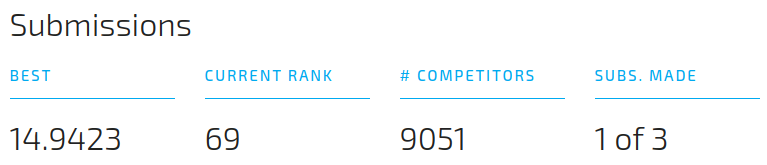

In [22]:
#Current Ranking (baseline)
Image("img/current-27-05.png")

In [15]:
# Tensorboard
# https://tensorboard.dev/experiment/rsdMubj0S165iOdLmbd13A/#scalars

In [49]:
# sj_model.save('models/sj_model_17.57MAP.h5') 
# iq_model.save('models/iq_model_17.57MAP.h5') 